<a href="https://colab.research.google.com/github/zobayer-al-mahmud/Clustering-Iris_Dataset/blob/main/Iris_Clustering_Zobayer_Al_Mahmud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# **2. Load dataset**

In [ ]:
iris = load_iris()
# Create a DataFrame with the specified column names
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# Exclude the 'species' column for unsupervised clustering
# df['species'] = iris.target # This line is commented out as requested


# **3.Data Preprocessing**

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print("First 5 rows of scaled data:")
print(df_scaled[:5])

First 5 rows of scaled data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# **4.EDA**

In [ ]:
print("Basic statistics of the data:")
print(df.describe())

Basic statistics of the data:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


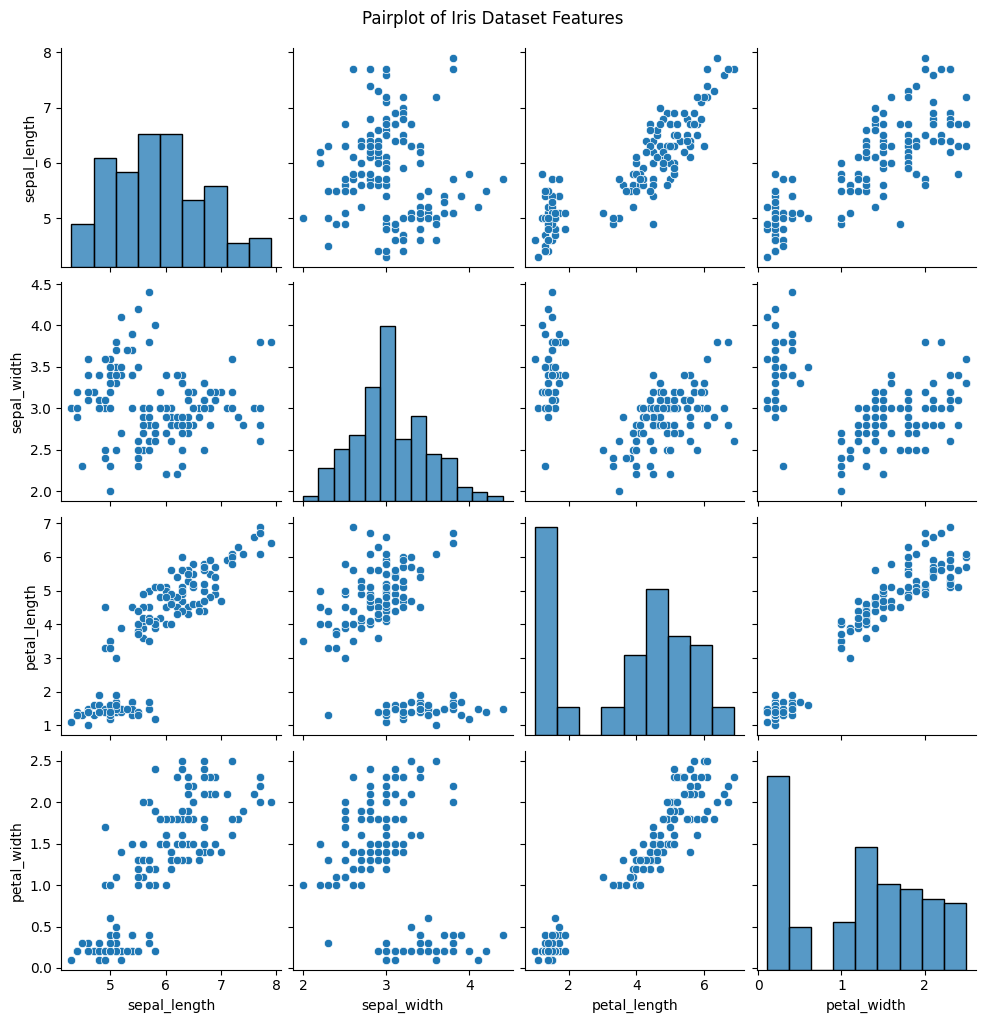

In [ ]:
# Plot pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

# **5. Apply Clustering Algorithms**

# **K-Means**

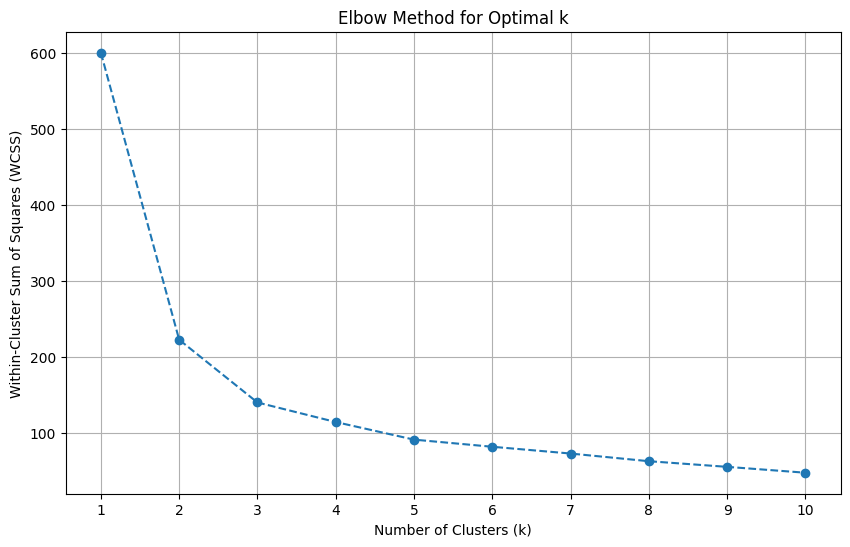

In [ ]:
# Try different values of k for K-Means
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

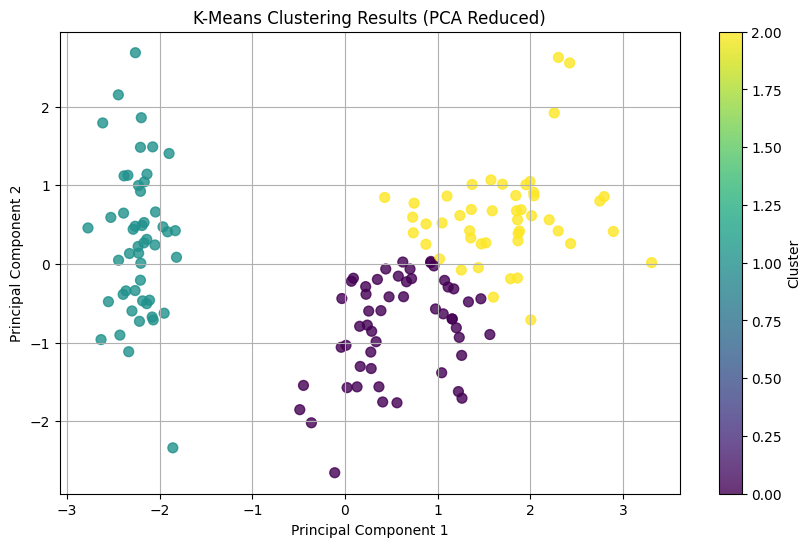

In [ ]:
# Based on the elbow method, choose k=3
optimal_k = 3

# Run K-Means with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(df_scaled)

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# **Hierarchical Clustering**

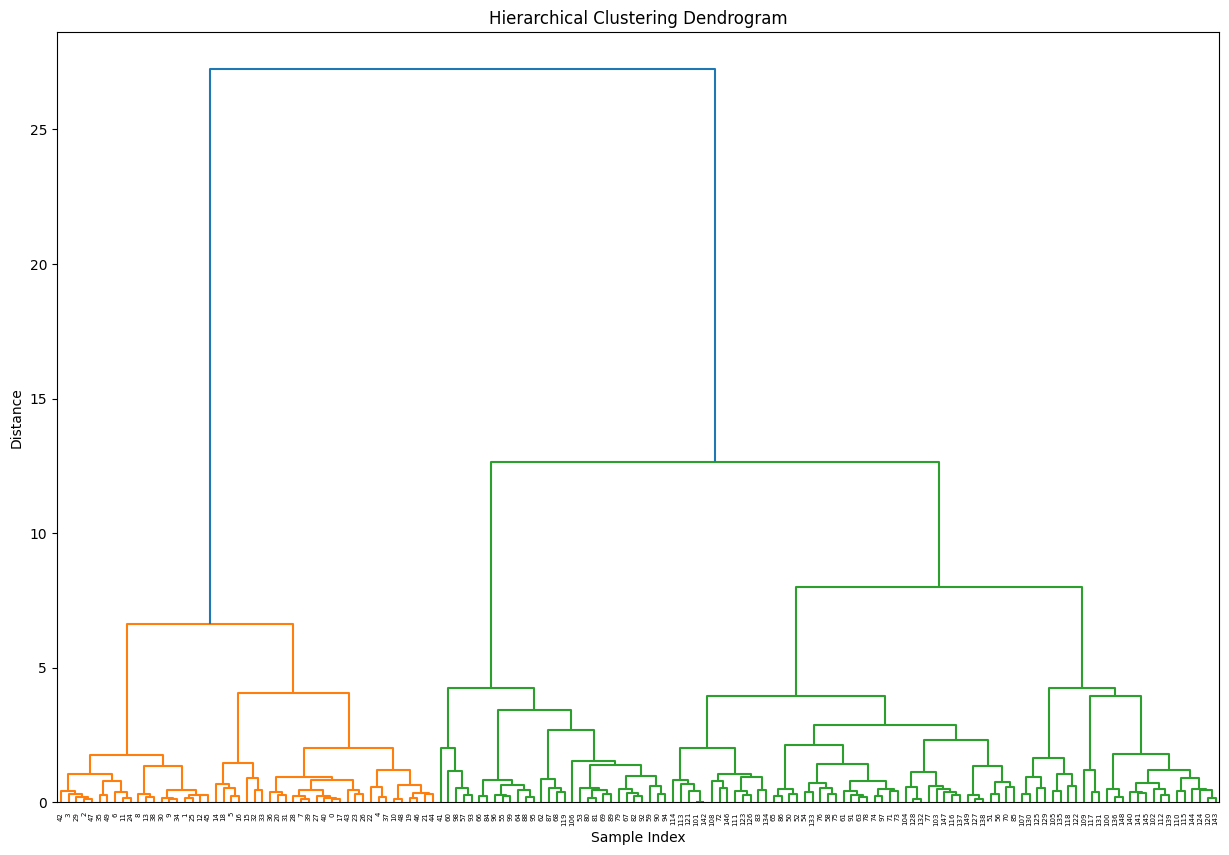

In [ ]:
# Create a dendrogram using linkage
linked = linkage(df_scaled, method='ward') # 'ward' minimizes the variance of the clusters being merged

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

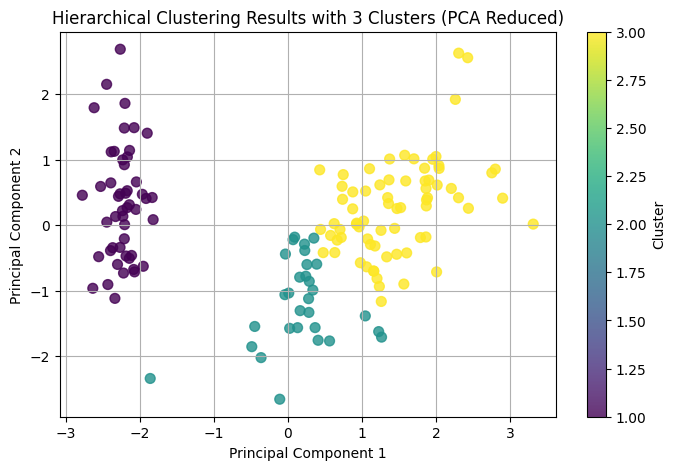

In [ ]:
# Decide on the number of clusters from the dendrogram (e.g., 3)
num_clusters = 3

# Apply hierarchical clustering to get the cluster labels
hierarchical_clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Reduce dimensions with PCA for visualization (if not already done)
if 'df_pca' not in locals():
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

# Visualize the results
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_clusters, cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title(f'Hierarchical Clustering Results with {np.max(hierarchical_clusters)} Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# **DBSCAN**

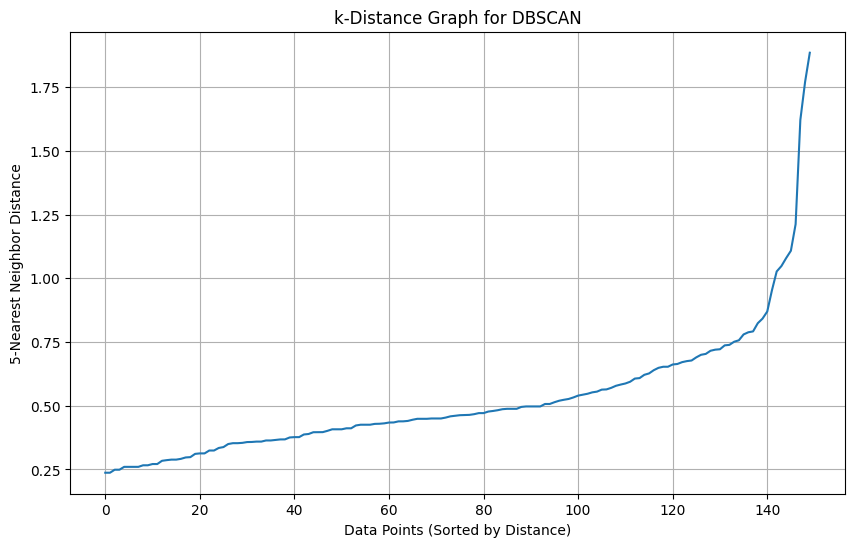

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calculate k-distances to find a good eps value
# Typically, k is chosen as min_samples - 1. Let's use min_samples = 5 as a common starting point.
min_samples = 5
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Sort distances and plot
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Graph for DBSCAN')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'{min_samples}-Nearest Neighbor Distance')
plt.grid(True)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 34


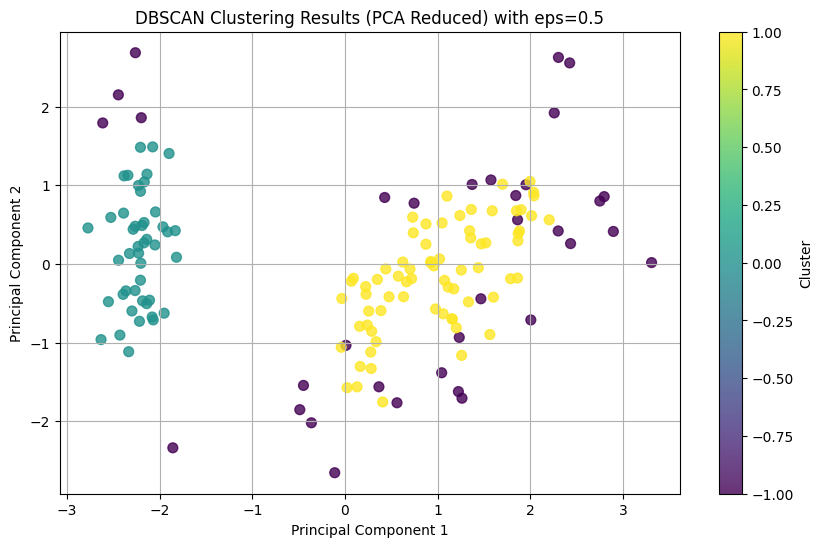

In [ ]:
# Based on the k-distance graph, choose a suitable eps value (look for the "elbow")
# Let's start with a placeholder eps value, you should adjust this based on the plot
chosen_eps = 0.5 # Placeholder value - adjust based on the k-distance graph
min_samples = 5 # Common starting point - adjust if needed

# Run DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Report the number of clusters found (excluding noise, which is labeled as -1)
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


# Reduce dimensions with PCA for visualization (if not already done)
if 'df_pca' not in locals():
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title(f'DBSCAN Clustering Results (PCA Reduced) with eps={chosen_eps}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

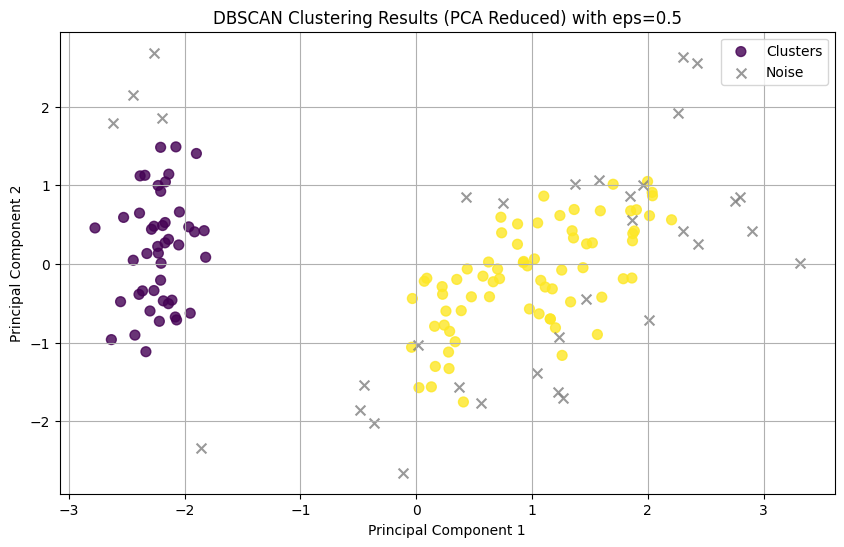

In [ ]:
# Reduce dimensions with PCA for visualization (if not already done)
if 'df_pca' not in locals():
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

# Visualize the results, highlighting noise points
plt.figure(figsize=(10, 6))
# Plot non-noise points
plt.scatter(df_pca[dbscan_clusters != -1, 0], df_pca[dbscan_clusters != -1, 1],
            c=dbscan_clusters[dbscan_clusters != -1], cmap='viridis', marker='o', s=50, alpha=0.8, label='Clusters')
# Plot noise points
plt.scatter(df_pca[dbscan_clusters == -1, 0], df_pca[dbscan_clusters == -1, 1],
            c='gray', marker='x', s=50, alpha=0.8, label='Noise')
plt.title(f'DBSCAN Clustering Results (PCA Reduced) with eps={chosen_eps}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# **6. Evaluation**

In [ ]:
# Get the true species labels
true_labels = iris.target

# Evaluate K-Means clustering
print("Confusion Matrix for K-Means:")
# Since K-Means cluster labels are arbitrary (0, 1, 2), we need to find the best mapping to true labels
# This can be done by finding the mapping that minimizes the number of misclassified points
# A simple way is to use the confusion matrix and look at the counts
kmeans_conf_matrix = confusion_matrix(true_labels, kmeans_clusters)
print(kmeans_conf_matrix)

# Evaluate Hierarchical Clustering
print("\nConfusion Matrix for Hierarchical Clustering:")
# Similar to K-Means, find the best mapping for hierarchical cluster labels
hierarchical_conf_matrix = confusion_matrix(true_labels, hierarchical_clusters)
print(hierarchical_conf_matrix)

# Evaluate DBSCAN clustering (only if clusters were found)
if n_clusters_ > 0:
    print("\nConfusion Matrix for DBSCAN (excluding noise):")
    # Exclude noise points (-1) for evaluation against true labels
    non_noise_indices = np.where(dbscan_clusters != -1)
    dbscan_conf_matrix = confusion_matrix(true_labels[non_noise_indices], dbscan_clusters[non_noise_indices])
    print(dbscan_conf_matrix)
else:
    print("\nDBSCAN did not find any clusters (all points are noise). Cannot generate confusion matrix.")


# You can also calculate other metrics like Adjusted Rand Index
# print("\nAdjusted Rand Index for K-Means:", adjusted_rand_score(true_labels, kmeans_clusters))
# print("Adjusted Rand Index for Hierarchical Clustering:", adjusted_rand_score(true_labels, hierarchical_clusters))
# if n_clusters_ > 0:
#     print("Adjusted Rand Index for DBSCAN (excluding noise):", adjusted_rand_score(true_labels[non_noise_indices], dbscan_clusters[non_noise_indices]))

Confusion Matrix for K-Means:
[[ 0 50  0]
 [39  0 11]
 [14  0 36]]

Confusion Matrix for Hierarchical Clustering:
[[ 0 49  1  0]
 [ 0  0 27 23]
 [ 0  0  2 48]
 [ 0  0  0  0]]

Confusion Matrix for DBSCAN (excluding noise):
[[45  0  0]
 [ 0 39  0]
 [ 0 32  0]]


In [ ]:
# Get the true species labels
true_labels = iris.target

# Calculate and print Adjusted Rand Index for K-Means
kmeans_ari = adjusted_rand_score(true_labels, kmeans_clusters)
print(f"Adjusted Rand Index for K-Means: {kmeans_ari:.4f}")

# Calculate and print Adjusted Rand Index for Hierarchical Clustering
hierarchical_ari = adjusted_rand_score(true_labels, hierarchical_clusters)
print(f"Adjusted Rand Index for Hierarchical Clustering: {hierarchical_ari:.4f}")

# Calculate and print Adjusted Rand Index for DBSCAN (only if clusters were found)
if n_clusters_ > 0:
    # Exclude noise points (-1) for evaluation against true labels
    non_noise_indices = np.where(dbscan_clusters != -1)
    dbscan_ari = adjusted_rand_score(true_labels[non_noise_indices], dbscan_clusters[non_noise_indices])
    print(f"Adjusted Rand Index for DBSCAN (excluding noise): {dbscan_ari:.4f}")
else:
    print("\nDBSCAN did not find any clusters (all points are noise). Cannot calculate Adjusted Rand Index.")

Adjusted Rand Index for K-Means: 0.6201
Adjusted Rand Index for Hierarchical Clustering: 0.6153
Adjusted Rand Index for DBSCAN (excluding noise): 0.6309
